<a href="https://colab.research.google.com/github/SarmadSaleeem/Phishing_Website_Detection/blob/main/Phishing_Website_Detection_(Dataset_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

## Display All columns and rows in collab

In [ ]:
pd.set_option('display.max_rows', None)  # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns

# Uploading Dataset

In [ ]:
dataset = pd.read_csv("drive/MyDrive/Datasets/dataset_phishing_2.csv")

# Dataset Information

## First Five Rows

In [ ]:
first_five_rows = dataset.head()
first_five_rows

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


## Last Five Rows

In [ ]:
last_five_rows = dataset.tail()
last_five_rows

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
95905,www.freewebs.com/ryanrules2/,5001,0,1,8035,28,0,0,0,16,2,0
95906,www.ireland-information.com/freecelticfonts.htm,230251,0,1,8400,47,0,0,1,27,2,0
95907,www.clubtaunus.soroptimist.de/img/pro/e.php,10000000,0,0,0,43,0,0,0,29,3,1
95908,www.askmen.com/sports/business/index.html,2008,0,1,9862,41,0,0,0,14,2,0
95909,xosothudo.com.vn/paypal.co.il/paypal.co.il.cgi...,771840,0,0,0,323,0,0,0,16,2,1


## Columns of the dataset

In [ ]:
columns = dataset.columns
columns

Index(['domain', 'ranking', 'isIp', 'valid', 'activeDuration', 'urlLen', 'is@',
       'isredirect', 'haveDash', 'domainLen', 'nosOfSubdomain', 'label'],
      dtype='object')

## Data Types

In [ ]:
data_types = dataset.dtypes
data_types

,0
domain,object
ranking,int64
isIp,int64
valid,int64
activeDuration,int64
urlLen,int64
is@,int64
isredirect,int64
haveDash,int64
domainLen,int64


## Statistical Properties

In [ ]:
statistical_summary = dataset.describe()
statistical_summary

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,9.591000e+04,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000
mean,6.118618e+06,0.000229,0.573892,3747.876144,69.327442,0.002773,0.007444,0.157856,23.409061,2.387718,0.582984
std,4.835254e+06,0.015144,0.494512,3974.587188,69.740134,0.052591,0.085960,0.364608,25.426852,2.140997,0.493068
min,1.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3.205600e+04,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,14.000000,2.000000,0.000000
50%,1.000000e+07,0.000000,1.000000,2192.000000,44.000000,0.000000,0.000000,0.000000,17.000000,2.000000,1.000000
75%,1.000000e+07,0.000000,1.000000,7670.000000,78.000000,0.000000,0.000000,0.000000,22.000000,2.000000,1.000000
max,1.000000e+07,1.000000,1.000000,15707.000000,2175.000000,1.000000,1.000000,1.000000,244.000000,34.000000,1.000000


## Dataset information

In [ ]:
dataset_info = dataset.info()
dataset_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   domain          95910 non-null  object
 1   ranking         95910 non-null  int64 
 2   isIp            95910 non-null  int64 
 3   valid           95910 non-null  int64 
 4   activeDuration  95910 non-null  int64 
 5   urlLen          95910 non-null  int64 
 6   is@             95910 non-null  int64 
 7   isredirect      95910 non-null  int64 
 8   haveDash        95910 non-null  int64 
 9   domainLen       95910 non-null  int64 
 10  nosOfSubdomain  95910 non-null  int64 
 11  label           95910 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 8.8+ MB


## No of Legitmate vs Phishing Websites

In [ ]:
dataset['label'].value_counts()

,count
label,
1,55914
0,39996


# Data Pre Processing

## Check for Missing Values

In [ ]:
missing_values = dataset.isnull().sum()
missing_values

,0
domain,0
ranking,0
isIp,0
valid,0
activeDuration,0
urlLen,0
is@,0
isredirect,0
haveDash,0
domainLen,0


## Check for negative values

In [ ]:
numeric_columns = dataset.select_dtypes(include=['int64'])

# Check which numeric columns contain negative values
negative_columns = (numeric_columns < 0).sum()
negative_columns

# Display columns that have negative values
columns_with_negatives = negative_columns[negative_columns > 0]
print(columns_with_negatives)

Series([], dtype: int64)


## Remove domain colums

In [ ]:
dataset = dataset.drop('domain', axis=1)

## Normalization

In [ ]:
scaler = StandardScaler()
numerical_columns = ['ranking', 'activeDuration', 'urlLen', 'domainLen']

dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

In [ ]:
dataset.head(20)

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,0.802730,0,0,-0.942965,-0.707307,0,0,1,-0.134074,2,1
1,-1.225114,0,1,0.894972,-0.391849,0,0,0,-0.448704,2,0
2,0.802730,0,0,-0.942965,1.228461,0,0,0,-0.370046,1,1
3,-1.263977,0,0,-0.942965,-0.492222,0,0,0,-0.212731,3,0
4,0.802730,0,1,-0.759297,0.138695,0,0,1,-0.370046,1,1
5,0.802730,0,1,-0.667211,-0.692968,0,0,0,-0.252060,1,1
6,0.802730,0,1,2.089567,-0.420527,0,0,0,-0.173403,2,0
7,-1.260629,0,0,-0.942965,-0.277137,0,0,0,-0.134074,3,0
8,0.802730,0,0,-0.942965,-0.649951,0,0,0,-0.330717,3,0
9,0.802730,0,1,0.619470,-0.606934,0,0,0,-0.409375,2,0


## Over Sampling

In [ ]:
df_majority = dataset[dataset.label == 1]
df_minority = dataset[dataset.label == 0]

df_minority_upsampled = resample(df_minority,
                                 replace=True,  # sample with replacement
                                 n_samples=len(df_majority),  # match number in majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset to mix the rows after resampling
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
dataset.shape

(95910, 11)

In [ ]:
df_balanced.shape

(111828, 11)

In [ ]:
df_balanced['label'].value_counts()

,count
label,
1,55914
0,55914


## Shuffling

In [ ]:
# Shuffle the dataset to mix the rows after resampling
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
dataset.head(50)

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,0.802730,0,0,-0.942965,-0.707307,0,0,1,-0.134074,2,1
1,-1.225114,0,1,0.894972,-0.391849,0,0,0,-0.448704,2,0
2,0.802730,0,0,-0.942965,1.228461,0,0,0,-0.370046,1,1
3,-1.263977,0,0,-0.942965,-0.492222,0,0,0,-0.212731,3,0
4,0.802730,0,1,-0.759297,0.138695,0,0,1,-0.370046,1,1
5,0.802730,0,1,-0.667211,-0.692968,0,0,0,-0.252060,1,1
6,0.802730,0,1,2.089567,-0.420527,0,0,0,-0.173403,2,0
7,-1.260629,0,0,-0.942965,-0.277137,0,0,0,-0.134074,3,0
8,0.802730,0,0,-0.942965,-0.649951,0,0,0,-0.330717,3,0
9,0.802730,0,1,0.619470,-0.606934,0,0,0,-0.409375,2,0


In [ ]:
dataset.to_csv('cleaned_dataset.csv', index=False)
from google.colab import files
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualization

## Distribution of the target variable (Phishing vs Legitimate websites)

<ipython-input-24-e46d9d94c038>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_balanced, palette='Set2')


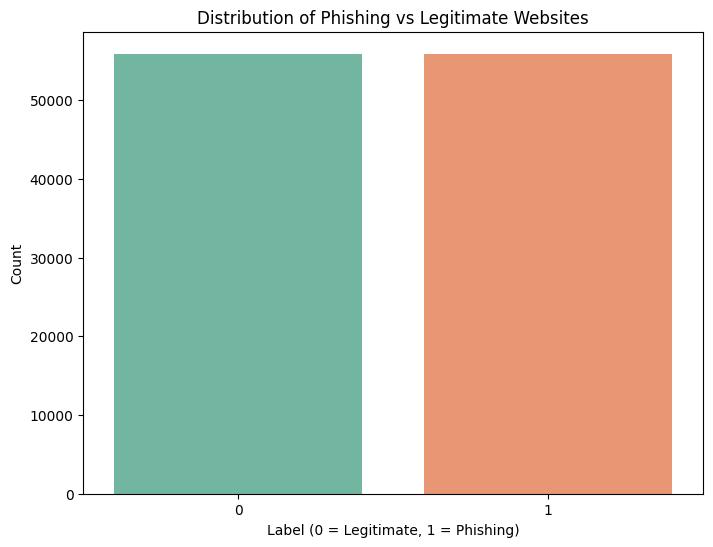

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_balanced, palette='Set2')
plt.title('Distribution of Phishing vs Legitimate Websites')
plt.xlabel('Label (0 = Legitimate, 1 = Phishing)')
plt.ylabel('Count')
plt.show()

## Distribution of URL Length for Phishing and Legitimate websites

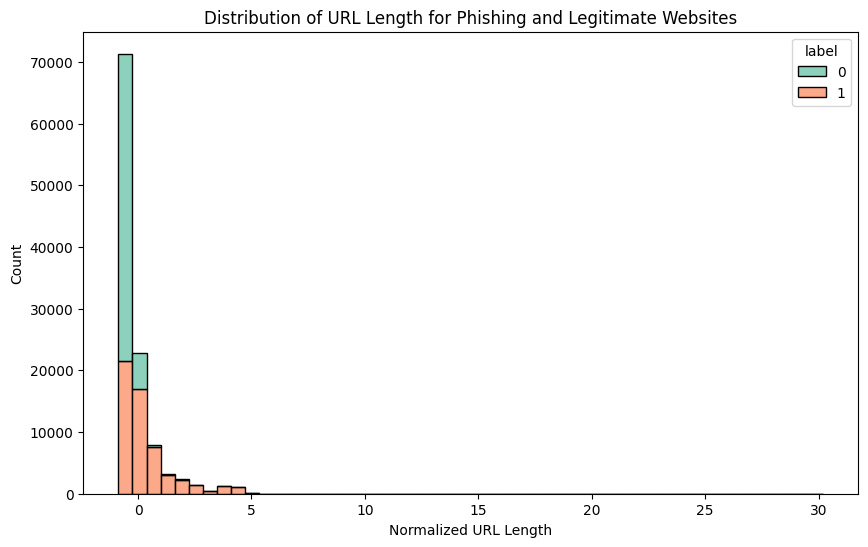

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_balanced, x='urlLen', hue='label', multiple='stack', palette='Set2', bins=50)
plt.title('Distribution of URL Length for Phishing and Legitimate Websites')
plt.xlabel('Normalized URL Length')
plt.ylabel('Count')
plt.show()

## Boxplot of Active Duration vs Label

<ipython-input-26-f0d4e796689a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='activeDuration', data=df_balanced, palette='Set2')


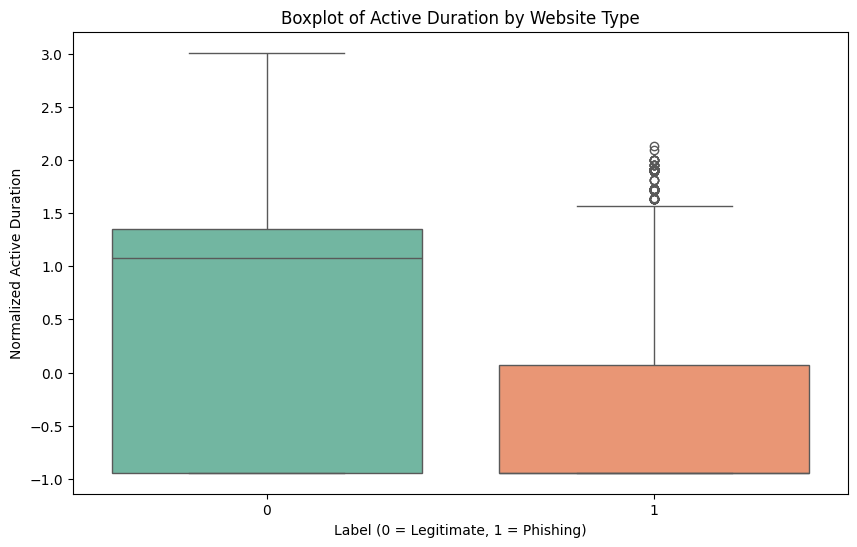

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='activeDuration', data=df_balanced, palette='Set2')
plt.title('Boxplot of Active Duration by Website Type')
plt.xlabel('Label (0 = Legitimate, 1 = Phishing)')
plt.ylabel('Normalized Active Duration')
plt.show()

## Correlation heatmap of features

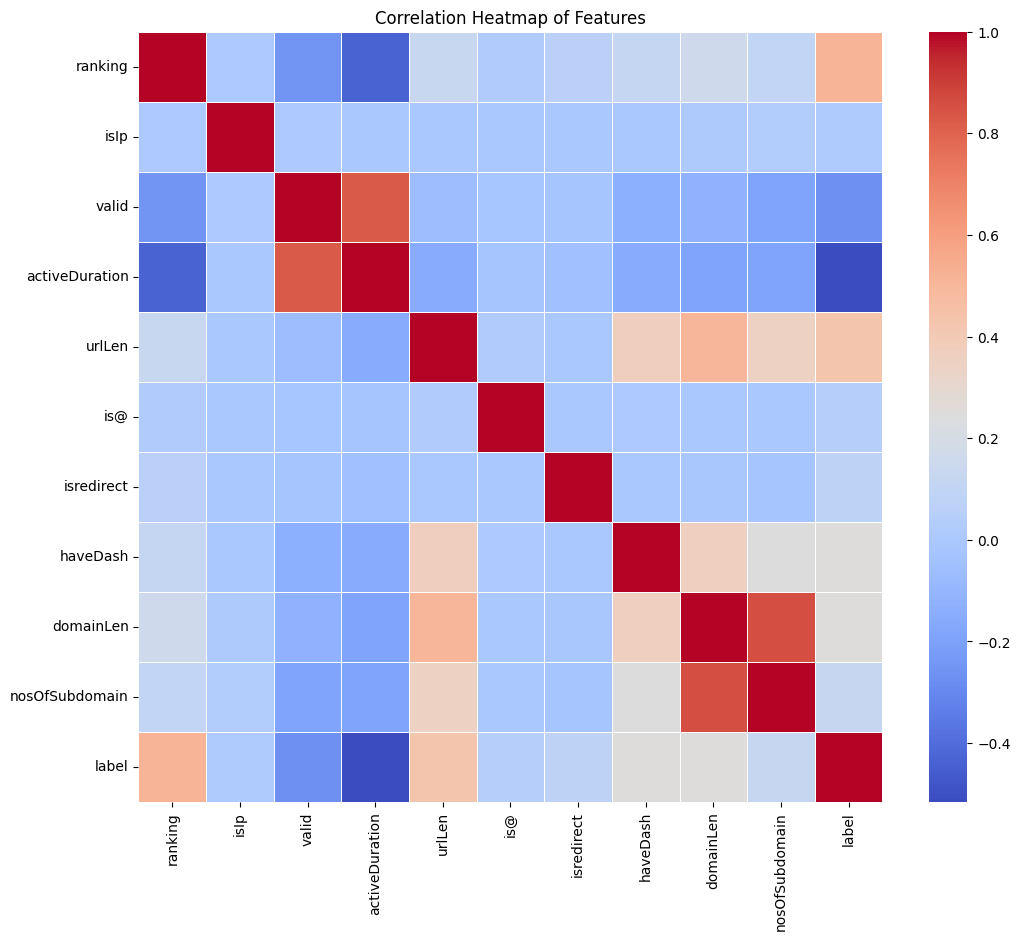

In [ ]:
plt.figure(figsize=(12, 10))
corr = df_balanced.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

## Pair Plot between different features

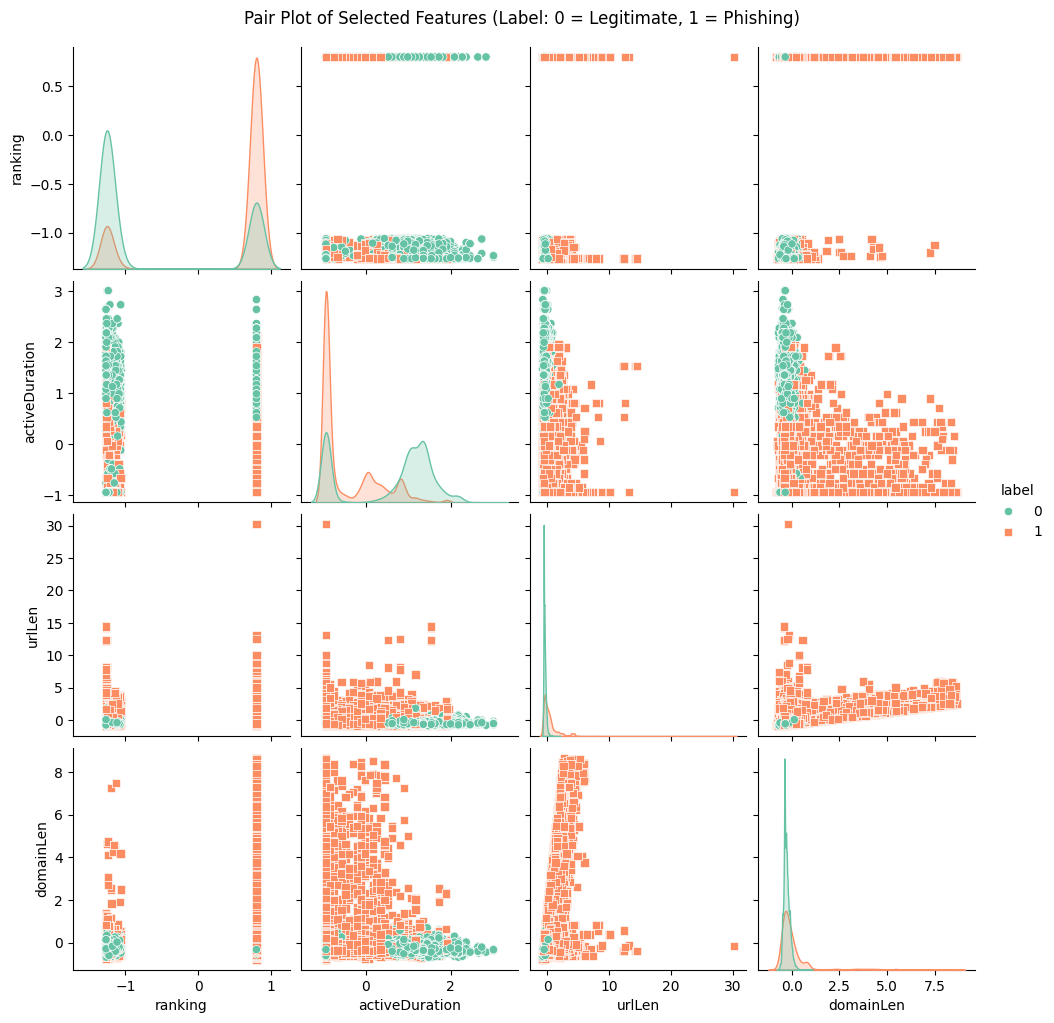

In [ ]:
# Select a subset of features for pair plotting
subset_features = ['ranking', 'activeDuration', 'urlLen', 'domainLen', 'label']

# Pair plot to visualize relationships between these features
sns.pairplot(df_balanced[subset_features], hue='label', palette='Set2', markers=["o", "s"])
plt.suptitle("Pair Plot of Selected Features (Label: 0 = Legitimate, 1 = Phishing)", y=1.02)
plt.show()

# Model Training


## Split Dataset into Features (X) and Target (y)

In [ ]:
X = dataset.drop('label', axis=1)  # Features
y = dataset['label']  # Target variable

## Function to Train and Evaluate Models


In [ ]:
# Function to train models and evaluate performance
def train_evaluate_model(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'SVM': SVC(kernel='linear', probability=True),  # Linear kernel for SVM or increase tol if RBF
        'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1)  # Use multi-threading for Random Forest
    }

    results = {}
    cm_dict = {}

    for model_name, model in models.items():
        # Train the model
        if model_name == 'SVM':  # Use a smaller subset for SVM to reduce runtime
            X_train_svm, _, y_train_svm, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)
            model.fit(X_train_svm, y_train_svm)
        else:
            model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability for AUC

        # Evaluate performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        cm_dict[model_name] = cm  # Store confusion matrix for the model

        # Store results
        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'AUC': auc,
            'Confusion Matrix': cm
        }

    return results, cm_dict  # Return both results and confusion matrix dictionary

## Splitting the Dataset into Three Configurations

In [ ]:
splits = {
    '80-20 Split': train_test_split(X, y, test_size=0.2, random_state=42),
    '70-30 Split': train_test_split(X, y, test_size=0.3, random_state=42),
    '60-40 Split': train_test_split(X, y, test_size=0.4, random_state=42)
}

## Visualization for Confusion Matrix

In [ ]:
def plot_confusion_matrices(cm_dict, model_name):
    plt.figure(figsize=(15, 5))

    # Iterate over the splits and confusion matrices
    for i, (split_name, cm) in enumerate(cm_dict.items(), 1):
        plt.subplot(1, 3, i)  # 1 row, 3 columns
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'{model_name} - {split_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()

## Train and Evaluate Models on Each Split

Results for 80-20 Split:

Logistic Regression:
Accuracy: 0.8809
Precision: 0.9015
Recall: 0.8972
F1 Score: 0.8993
AUC: 0.9439
Confusion Matrix:
[[ 6695  1115]
 [ 1169 10203]]

SVM:
Accuracy: 0.8853
Precision: 0.9028
Recall: 0.9039
F1 Score: 0.9033
AUC: 0.9443
Confusion Matrix:
[[ 6703  1107]
 [ 1093 10279]]

Random Forest:
Accuracy: 0.9560
Precision: 0.9651
Recall: 0.9605
F1 Score: 0.9628
AUC: 0.9893
Confusion Matrix:
[[ 7415   395]
 [  449 10923]]


Results for 70-30 Split:

Logistic Regression:
Accuracy: 0.8787
Precision: 0.8988
Recall: 0.8947
F1 Score: 0.8967
AUC: 0.9431
Confusion Matrix:
[[10140  1706]
 [ 1783 15144]]

SVM:
Accuracy: 0.8836
Precision: 0.9047
Recall: 0.8966
F1 Score: 0.9006
AUC: 0.9437
Confusion Matrix:
[[10247  1599]
 [ 1750 15177]]

Random Forest:
Accuracy: 0.9558
Precision: 0.9639
Recall: 0.9608
F1 Score: 0.9624
AUC: 0.9887
Confusion Matrix:
[[11237   609]
 [  663 16264]]


Results for 60-40 Split:

Logistic Regression:
Accuracy: 0.8768
Precision: 0.8938
Recall: 

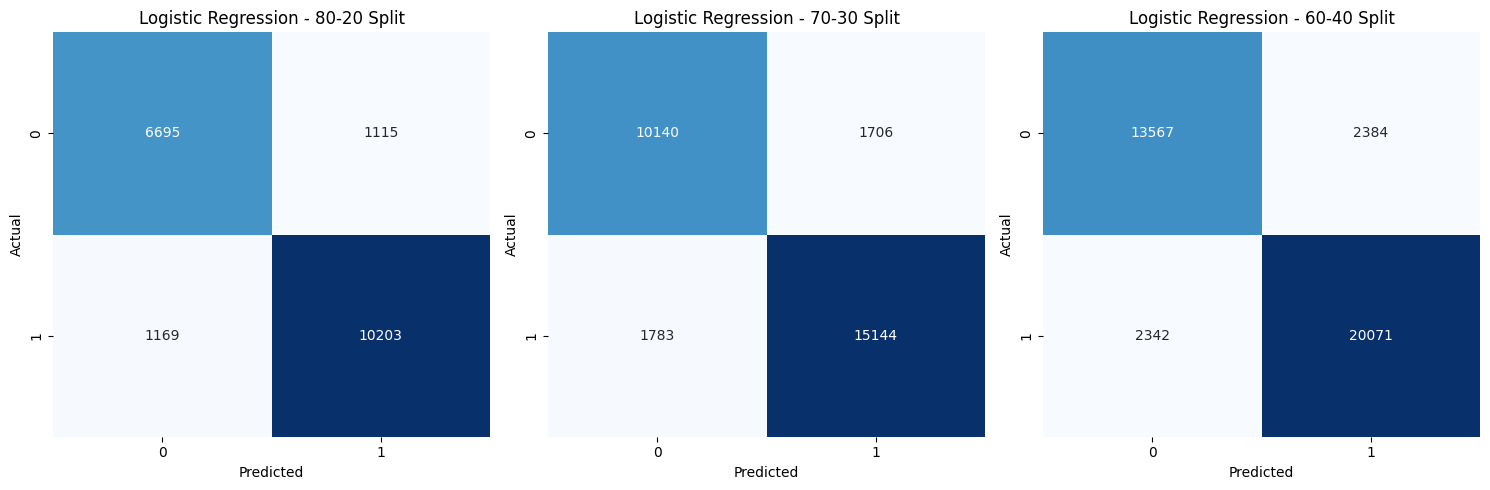

SVM Confusion Matrices:


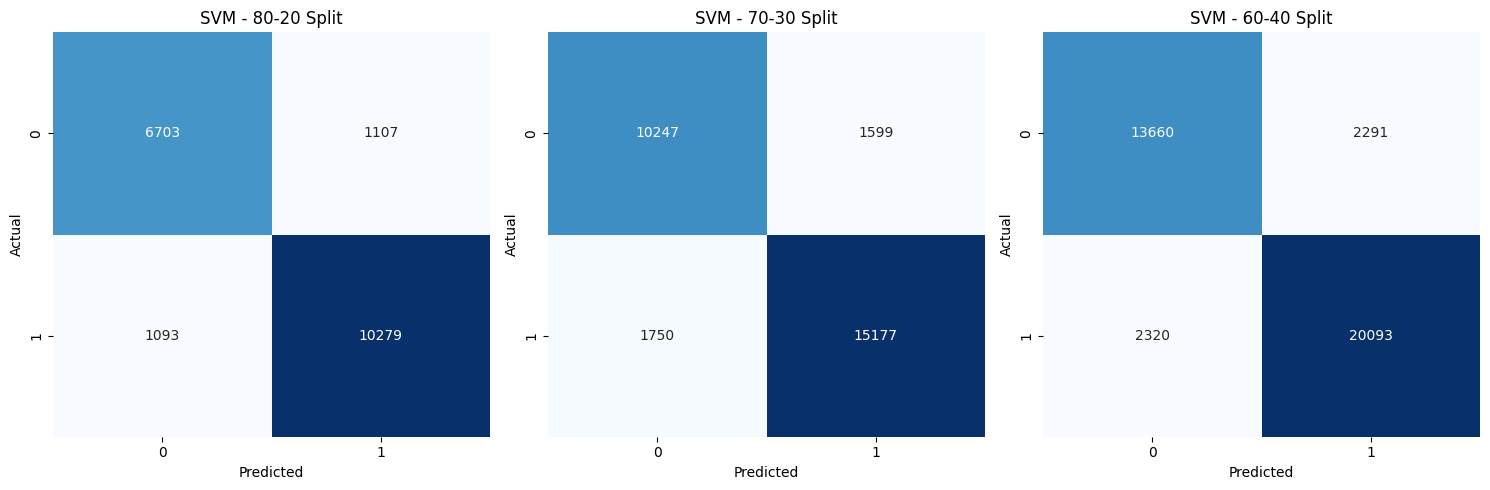

Random Forest Confusion Matrices:


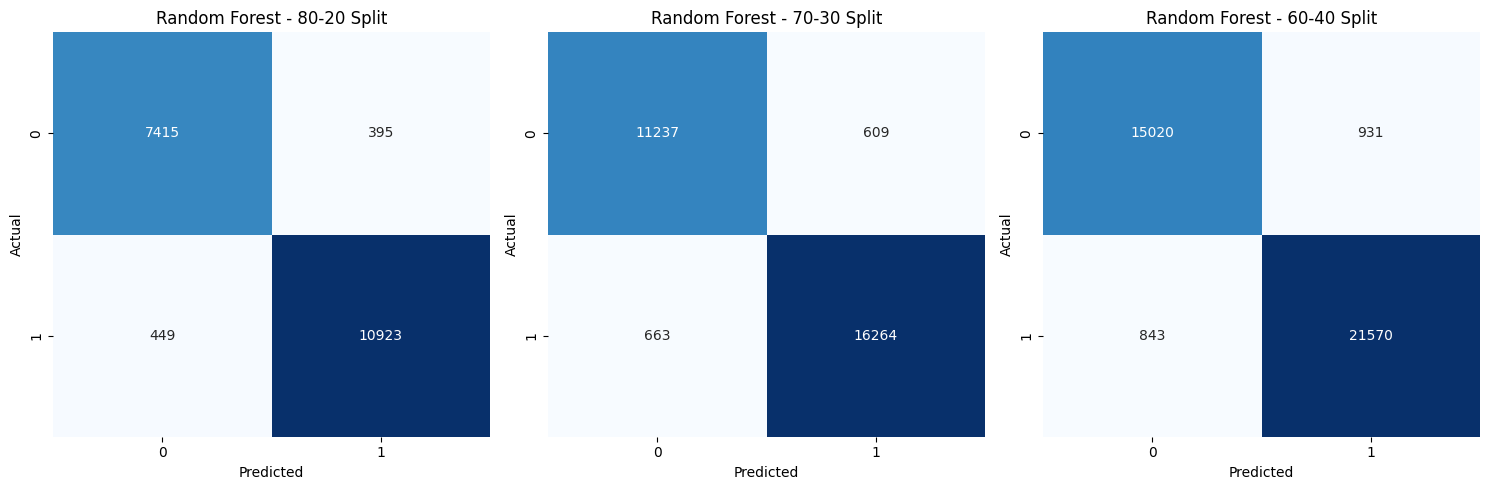

In [ ]:
cm_logistic_regression = {}
cm_svm = {}
cm_random_forest = {}

for split_name, (X_train, X_test, y_train, y_test) in splits.items():
    print(f"Results for {split_name}:")

    # Train and evaluate models
    results, cm_dict = train_evaluate_model(X_train, X_test, y_train, y_test)

    # Print the results
    for model_name, metrics in results.items():
        print(f"\n{model_name}:")
        for metric_name, value in metrics.items():
            # Check if the value is a NumPy array (like the Confusion Matrix)
            if isinstance(value, np.ndarray):
                print(f"{metric_name}:\n{value}")  # Print arrays (Confusion Matrix) without formatting
            else:
                print(f"{metric_name}: {value:.4f}")  # Print other numerical metrics with formatting

        # Store confusion matrices for plotting later
        if model_name == 'Logistic Regression':
            cm_logistic_regression[split_name] = metrics['Confusion Matrix']
        elif model_name == 'SVM':
            cm_svm[split_name] = metrics['Confusion Matrix']
        elif model_name == 'Random Forest':
            cm_random_forest[split_name] = metrics['Confusion Matrix']

    print("\n" + "="*50 + "\n")

# Plot confusion matrices for all models across all splits
print("Logistic Regression Confusion Matrices:")
plot_confusion_matrices(cm_logistic_regression, "Logistic Regression")

print("SVM Confusion Matrices:")
plot_confusion_matrices(cm_svm, "SVM")

print("Random Forest Confusion Matrices:")
plot_confusion_matrices(cm_random_forest, "Random Forest")